In [ ]:
#Импортируем модули и библиотеки
import numpy as np 
import gdown
import os
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline


In [ ]:
TRAINING_DATA = '/content/iris_train' # Папка для обучающего набора данных
TEST_DATA   = '/content/iris_test'  # Папка для тестировочной выборки
VALIDATION_DATA = '/content/iris_validation' # Папка для валидационной выборки
TEST_SPLIT          = 0.2                   # Доля тестовых данных в общем наборе
VAL_SPLIT           = 0.2                   # Доля проверочной выборки в обучающем наборе

In [ ]:
os.mkdir(TRAINING_DATA)   # Папка для обучающей выборки

In [ ]:
os.mkdir(TEST_DATA)   # Папка для тестировочной выборки

In [ ]:
os.mkdir(VALIDATION_DATA)  # Папка для валидационной выборки

In [ ]:
# Загрузка zip-архива с датасетом из облака на диск виртуальной машины colab
gdown.download('https://drive.google.com/uc?id=1RbG7rr_M0DFKEelNVLZyY1tvF4hIWxLM', None, quiet=True)

'DATASET_1.zip'

In [ ]:
# Очистка данных от прошлого запуска
!rm -rf {TRAINING_DATA} {TEST_PATH}
!rm -rf `find -type d -name .ipynb_checkpoints`
# Разархивация датасета в директорию данных
!unzip -qo "DATASET_1.zip" -d {TRAINING_DATA}

In [ ]:
#Задаем список классов из списка папок
CLASS_LIST = sorted(os.listdir(TRAINING_DATA)) # Определение списка имен классов
CLASS_COUNT = len(CLASS_LIST)  # Определение количества классов
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}') # Проверка результата

Количество классов: 64, метки классов: ['001', '002', '003', '004', '005', '006', '007', '008', '009', '010', '011', '012', '013', '014', '015', '016', '017', '018', '019', '020', '021', '022', '023', '024', '025', '026', '027', '028', '029', '030', '031', '032', '033', '034', '035', '036', '037', '038', '039', '040', '041', '042', '043', '044', '045', '046', '047', '048', '049', '050', '051', '052', '053', '054', '055', '056', '057', '058', '059', '060', '061', '062', '063', '064']


In [ ]:
i = 1
# Формирование пути к выборке одному глазу
f'{TRAINING_DATA}{CLASS_LIST[i]}/'

'/content/iris_test002/'

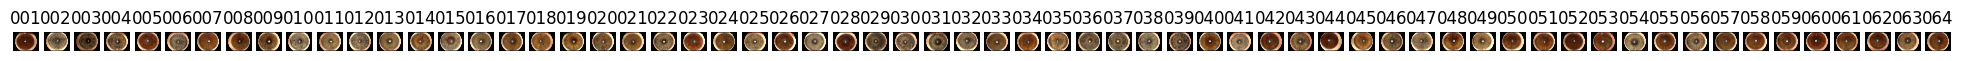

In [ ]:
# Создание заготовки для изображений всех классов
fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(25, 5))

# Для всех номеров классов:
for i in range(CLASS_COUNT):
    # Формирование пути к папке содержимого класса
    class_path = f'{TRAINING_DATA}/{CLASS_LIST[i]}' 
    # Выбор случайного фото из i-го класса
    img_path = class_path +'/'+random.choice(os.listdir(class_path)) 
    # Отображение фотографии
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))  
    axs[i].axis('off')

# Отрисовка всего полотна
plt.show()

In [ ]:
# Перенос файлов для теста в отдельное дерево папок, расчет размеров наборов данных
train_count = 0   
test_count = 0    

for class_name in CLASS_LIST:                              # Для всех классов по порядку номеров (их меток)
    class_path = f'{TRAINING_DATA}/{class_name}'           # Формирование полного пути к папке с изображениями класса
    test_path = f'{TEST_DATA}/{class_name}'                # Полный путь для тестовых данных класса
    class_files = os.listdir(class_path)                   # Получение списка имен файлов с изображениями текущего класса
    class_file_count = len(class_files)                    # Получение общего числа файлов класса
    test_file_count = int(class_file_count * TEST_SPLIT)   # Определение числа тестовых файлов для класса
    test_files = class_files[-test_file_count:]            # Выделение файлов для теста от конца списка
    for f in test_files:                                   # Перемещение тестовых файлов в папку для теста
        os.rename(f'{class_path}/{f}', f'{test_path}/{f}')
    train_count += class_file_count                        # Увеличение общего счетчика файлов обучающего набора
    test_count += test_file_count                          # Увеличение общего счетчика файлов тестового набора

    print(f'Размер класса {class_name}: {class_file_count} фото, для теста выделено файлов: {test_file_count}')

print(f'Общий размер базы: {train_count}, выделено для обучения: {train_count - test_count}, для теста: {test_count}')

Аугументация данных